<a href="https://colab.research.google.com/github/liyanaizani/Recommender-Engine/blob/main/Mini_Project_Smartphone_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaption and Dataset is from: https://www.kaggle.com/dsrivastava2020/recommendation-system



In [1]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619427 sha256=ae45b88ddd7b64e9fb4e7945b2724bd9568637c778d47ab81ef09a0b2b169373
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Loading Data files
rev1 = pd.read_csv('/content/gdrive/MyDrive/Data/phone_user_review_file_1.csv', encoding='iso-8859-1')
rev2 = pd.read_csv('/content/gdrive/MyDrive/Data/phone_user_review_file_2.csv', encoding='iso-8859-1')
rev3 = pd.read_csv('/content/gdrive/MyDrive/Data/phone_user_review_file_3.csv', encoding='iso-8859-1')
rev4 = pd.read_csv('/content/gdrive/MyDrive/Data/phone_user_review_file_4.csv', encoding='iso-8859-1')
rev5 = pd.read_csv('/content/gdrive/MyDrive/Data/phone_user_review_file_5.csv', encoding='iso-8859-1')
rev6 = pd.read_csv('/content/gdrive/MyDrive/Data/phone_user_review_file_6.csv', encoding='iso-8859-1')  

In [5]:
rev1.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/
date,5/2/2017,4/28/2017,5/4/2017,5/2/2017,5/11/2017
lang,en,en,en,en,en
country,us,us,us,us,us
source,Verizon Wireless,Phone Arena,Amazon,Samsung,Verizon Wireless
domain,verizonwireless.com,phonearena.com,amazon.com,samsung.com,verizonwireless.com
score,10,10,6,9.2,4
score_max,10,10,10,10,10
extract,As a diehard Samsung fan who has had every Sam...,Love the phone. the phone is sleek and smooth ...,Adequate feel. Nice heft. Processor's still sl...,Never disappointed. One of the reasons I've be...,I've now found that i'm in a group of people t...
author,CarolAnn35,james0923,R. Craig,Buster2020,S Ate Mine


In [6]:
rev2.head().T

,0,1,2,3,4
phone_url,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/
date,4/15/2015,5/23/2015,4/27/2015,4/22/2015,4/18/2015
lang,en,en,en,en,en
country,us,gb,gb,gb,gb
source,Amazon,Amazon,Amazon,Amazon,Amazon
domain,amazon.com,amazon.co.uk,amazon.co.uk,amazon.co.uk,amazon.co.uk
score,2,10,8,10,10
score_max,10,10,10,10,10
extract,"The telephone headset is of poor quality , not...",This is my first smartphone so I have nothing ...,Great phone. Battery life not great but seems ...,Best 90 quid I've ever spent on a smart phone,I m happy with this phone.it s very good.thx team
author,luis,Mark Lavin,tracey,Reuben Ingram,viorel


In [7]:
rev3.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/
date,11/7/2015,10/2/2015,9/2/2015,9/2/2015,9/1/2015
lang,pt,pt,pt,pt,pt
country,br,br,br,br,br
source,Submarino,Submarino,Submarino,Submarino,Colombo
domain,submarino.com.br,submarino.com.br,submarino.com.br,submarino.com.br,colombo.com.br
score,6,10,10,8,8
score_max,10,10,10,10,10
extract,"recomendo, eu comprei um, a um ano, e agora co...",Comprei um pouco desconfiada do site e do celu...,"Muito bom o produto, obvio que tem versÃµes me...",Unica ressalva fica para a camera que poderia ...,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...
author,herlington tesch,Luisa Silva Marieta,Cyrus,Marcela Santa Clara Brito,Claudine Maria Kuhn Walendorff


In [8]:
rev4.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/
date,3/11/2015,17/11/2015,29/10/2015,29/10/2015,29/10/2015
lang,en,en,en,en,en
country,us,in,in,in,in
source,Amazon,Zopper,Amazon,Amazon,Amazon
domain,amazon.com,zopper.com,amazon.in,amazon.in,amazon.in
score,2,10,4,6,10
score_max,10,10,10,10,10
extract,was not conpatable with my phone as stated. I ...,Decent Functions and Easy to Operate Pros:- Th...,Not Good Phone such price. Hang too much and v...,not bad for features,Excellent product
author,Frances DeSimone,Expert Review,Amazon Customer,Amazon Customer,NHK


In [9]:
rev5.head().T

,0,1,2,3,4
phone_url,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/
date,7/13/2016,7/13/2016,7/13/2016,4/25/2014,4/23/2013
lang,en,en,en,en,en
country,in,in,in,in,in
source,91 Mobiles,91 Mobiles,91 Mobiles,Naaptol,Naaptol
domain,91mobiles.com,91mobiles.com,91mobiles.com,naaptol.com,naaptol.com
score,2,6,4,10,10
score_max,10,10,10,10,10
extract,I bought 1 month before. currently speaker is ...,"I just bought one week back, I have Airtel con...",one problem in this handset opera is not worki...,here Karbonn comes up with an another excellen...,"What a phone, all so on Naaptol my god 23% off..."
author,venkatesh,Venkat,krrish,BRIJESH CHAUHAN,Suraj CHAUHAN


In [10]:
rev6.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/
date,9/16/2011,2/13/2014,12/30/2011,10/18/2008,9/6/2008
lang,en,en,en,en,en
country,us,us,us,us,us
source,Phone Arena,Amazon,Phone Scoop,HandCellPhone,Reviewed.com
domain,phonearena.com,amazon.com,phonescoop.com,handcellphone.com,reviewed.com
score,8,6,9,4,6
score_max,10,10,10,10,10
extract,I've had the phone for awhile and it's a prett...,to be clear it is not the sellers fault that t...,Well i love this phone. i have had ton of phon...,I have had my Instinct for several months now ...,i have had this instinct phone for about two m...
author,ajabrams95,Stephanie,snickers,A4C,betaBgood


In [11]:
rev1.shape

(374910, 11)

In [12]:
rev2.shape

(114925, 11)

In [13]:
rev3.shape

(312961, 11)

In [14]:
rev4.shape

(98284, 11)

In [15]:
rev5.shape

(350216, 11)

In [16]:
rev6.shape

(163837, 11)

## Data preprocessing

In [17]:
# 1a. Merge the provided CSVs into one data-frame. 
rev_f = pd.concat([rev1,rev2,rev3,rev4,rev5,rev6],axis=0)

In [18]:
rev_copy = rev_f.copy()

In [19]:
#Checking training dataset attributes datatypes 
rev_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [20]:
# 1b. Check a few observations and shape of the data-frame.
rev_f.shape

(1415133, 11)

In [21]:
rev_f.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


Expolatory Analysis

In [22]:
null_counts = rev_f.isnull().sum()  # This prints the columns with the number of null values they have
print (null_counts)

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64


In [23]:
# 1d. Check for missing values. Impute the missing values if there is any. 
# filling the null values in column 'score' and 'score_max' 
rev_f = rev_f.fillna(rev_f.median())

# dropping the null values in columns 'extract' ,'author' and 'product'
rev_f = rev_f.dropna()

In [24]:
# 1c. Round oﬀ scores to the nearest integers. 
rev_f['score'] = rev_f['score'].astype(int) 
rev_f['score_max'] = rev_f['score_max'].astype(int) 

In [25]:
rev_f.shape

(1336416, 11)

In [26]:
# 1e. Check for duplicate values and remove them if there is any. 
rev_d = rev_f.drop_duplicates()

In [27]:
# 1g. Drop irrelevant features. Keep features like Author, Product, and Score. 
# we can drop phone_url,date,lang,country,source,domain and extract since they do not contribute in deciding popularity.  
rev_d.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)

In [28]:
rev_vs = rev_d.copy()

In [29]:
rev_d.shape

(1331600, 3)

In [30]:
# 1f. Keep only 1000000 data samples. Use random state=612
df = rev_d.sample(n=1000000, random_state=612)

In [31]:
# 2a. Identify the most rated features.
#sorting on products that got highest mean score
df.groupby('product')['score'].mean().sort_values(ascending=False).head()

product
Nokia 5310 Xpress Music, sakura red sim-free unbranded kein Vertrag    10.0
Oppo Find 5 X909 16 Gb White Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½                          10.0
Sony Ericsson W880i Prepay Mobile Phone On Orange                      10.0
Huawei Mobiltelefoner Mate 8 Dual SIM 32GB                             10.0
Huawei NOVA 4G MYSTIC SILVER                                           10.0
Name: score, dtype: float64

In [32]:
# 2 b. Identify the users with most number of reviews. 
(df['author'].value_counts()).head()

Amazon Customer    57765
Cliente Amazon     14564
e-bit               6309
Client d'Amazon     5720
Amazon Kunde        3624
Name: author, dtype: int64

In [33]:
# The product that got most number of reviews.
df['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     3908
Lenovo Vibe K4 Note (Black, 16GB)    3234
OnePlus 3 (Graphite, 64 GB)          3128
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64

In [34]:
# extracting authors who gave greater than 50 ratings
df1 = pd.DataFrame(columns=['author', 'a_count'])
df1['author']=df['author'].value_counts().index.tolist() 
df1['a_count'] = list(df['author'].value_counts() > 50)

In [35]:
# get names of indexes for which count column value is False
index_names = df1[ df1['a_count'] == False ].index 
# drop these row indexes from dataFrame 
df1.drop(index_names, inplace = True) 
df1

,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
674,Rose,True
675,missing,True
676,cemdiler,True
677,nicola,True


In [36]:
# extracting product that got more than 50 ratings
df2 = pd.DataFrame(columns=['product', 'p_count'])
df2['product']=df['product'].value_counts().index.tolist() 
df2['p_count'] = list(df['product'].value_counts() > 50)

In [37]:
# get names of indexes for which count column value is False
index_names = df2[ df2['p_count'] == False ].index 
# drop these row indexes from dataFrame 
df2.drop(index_names, inplace = True)

In [38]:
df2

,product,p_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4341,Tracfone LG 306G with 600 Minutes and Triple M...,True
4342,Smartphone LG Optimus L5 II Dual E455 Preto co...,True
4343,Sony Ericsson K810i Noble Blue UMTS Handy,True
4344,"Samsung Galaxy Mini 2 S6500, Nero [Germania]",True


In [39]:
# selecting data rows where product is having more than 50 ratings.  
df3 = df[df['product'].isin(df2['product'])] 
df3

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
116623,10,David B,Samsung S3350 Chat 335 Sim Free Mobile Phone
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
...,...,...,...
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...
281625,8,Patrix,"Huawei Ascend G510 Smartphone Touch, Fotocamer..."
110881,2,Amazon Customer,"Apple iPhone 5C Factory Unlocked Cellphone, 8G..."
36197,10,majere1975,"Samsung Smartphone Galaxy S Advance, Display 4..."


In [40]:
# selecting data rows from df3 where author has given more than 50 ratings.
# 2c. so that we get the data with products having more than 50 ratings and users who have given more than 50 ratings
df4 = df3[df3['author'].isin(df1['author'])]
df4

,score,author,product
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
290678,8,sara,"Samsung SM-N910F Galaxy Note 4 Smartphone, 32 ..."
101404,10,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼)
223332,8,Amazon Customer,Motorola Moto G 3rd Generation SIM-Free Smartp...
361379,10,e-bit,Smartphone Motorola Moto G 4 Play XT1603
...,...,...,...
21110,2,Amazon customer,Tracfone Motorola Moto E Android Prepaid Phone...
321740,8,Qantas,Sony Ericsson K810i Cyber-shot
269553,9,Capyto,Samsung M150 Cep Telefonu
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...


In [41]:
# 2c. Report the shape of the final dataset.
df4.shape

(108983, 3)

Collaborative filtering using KNN

In [42]:
# arranging columns in the order of user id,item id and rating to be fed 
columns_titles = ['author','product','score']
vs_rev = rev_vs.reindex(columns=columns_titles)

In [43]:
# Keep only 5000 data samples. Use random state=612
vs_data = vs_rev.sample(n=5000, random_state=612)

In [44]:
# Read dataset.
reader = Reader(rating_scale=(1, 10))
data_I = Dataset.load_from_df(vs_data,reader = reader)

In [45]:
trainset_I, testset_I = train_test_split(data_I, test_size=.15)

In [46]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_I)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [47]:
# run the  model against the testset
test_pred_I = algo.test(testset_I)

In [48]:
test_pred_I

[Prediction(uid='Alain MAISON', iid='TTfone TT59 Dual 2 TÃ©lÃ©phone portable dÃ©bloquÃ© 2G (Ecran: 1,77 pouces - 1 Mo - Double SIM) Noir', r_ui=10.0, est=8.049411764705882, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Karl', iid='Microsoft Nokia N97 Smartphone (QWERTZ-Tastatur, GPS, W-Lan, Ovi Karten, Kamera mit 5 MP) black', r_ui=8.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='cypressgladiator', iid='HTC Desire 500 Smartphone (8 Megapixelkamera, 10,9 cm (4,3 Zoll) Display, 1,2GHz, Quad-Core Prozessor, Android) glossy black', r_ui=10.0, est=8.049411764705882, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='onthefly', iid='Sony Ericsson K800i', r_ui=8.0, est=8.049411764705882, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ashrit09', iid='HTC One M8 - Gunmetal Gray', r_ui=10.0, est=8.049411764705882, details={'was

In [49]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_I, verbose=True)

Item-based Model : Test Set
RMSE: 2.8108


2.8108394635356557

KNN - User based model

In [50]:
reader = Reader(rating_scale=(1, 10))
data_U = Dataset.load_from_df(vs_data,reader = reader)

In [51]:
trainset_U, testset_U = train_test_split(data_U, test_size=.15)

In [52]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset_U)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [53]:
# query for specific predicions
uid = 'Frances DeSimone'  # raw user id
iid = 'Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce.'  # raw item id

In [54]:
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: Frances DeSimone item: Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce. r_ui = None   est = 8.03   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [55]:
# run the trained model against the testset
test_pred_U = algo.test(testset_U)

In [56]:
#6. Predict score (average rating) for test users
test_pred_U

[Prediction(uid='James Courchene', iid='Yousave Accessories Nokia Lumia 520 Case Black / Blue Tough Mesh Combo Silicone Cover', r_ui=10.0, est=8.027764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='P. de Joode', iid='BlackBerry Q10', r_ui=10.0, est=8.027764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Ruud', iid='Huawei P8 Champagne / 16 GB', r_ui=7.0, est=8.027764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='jahangir khan', iid='Lenovo Vibe K5 (Grey)', r_ui=8.0, est=8.027764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='jadenjenn', iid='SGH-T519 Trace', r_ui=10.0, est=8.027764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Pollos Hermanos', iid='Alcatel One Touch Idol 3 - Terminal libre (Android L, 

In [57]:
# 5. Evaluate the collaborative model. Print RMSE value for User Based CF
print("User-based Model : Test Set")
accuracy.rmse(test_pred_U, verbose=True)

User-based Model : Test Set
RMSE: 2.7249


2.7248547975756416

In [58]:
d_df = df
df.shape

(1000000, 3)

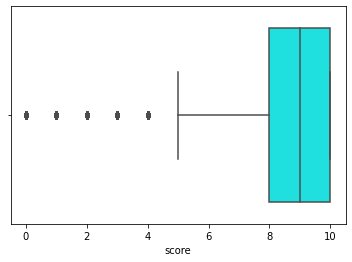

Boxplot of score
Q1 is :  8.0
Q2 is :  9.0
Q3 is :  10.0
IQR is: 2.0
Lower Whisker, Upper Whisker :  5.0 , 13.0
number of outliers are: 147884


In [59]:
# 9. Check for outliers and impute them as required. 
# only score is the column which is numeric so we check it for outliers.
#Checking for outliers in the sample of 1000000
sns.boxplot(x= d_df['score'], color='cyan')
plt.show()
print('Boxplot of score')
#calculating the outiers in attribute 
Q1 = d_df['score'].quantile(0.25)
Q2 = d_df['score'].quantile(0.50)
Q3 = d_df['score'].quantile(0.75) 
IQR = Q3 - Q1
L_W = (Q1 - 1.5 *IQR)
U_W = (Q3 + 1.5 *IQR)    
print('Q1 is : ',Q1)
print('Q2 is : ',Q2)
print('Q3 is : ',Q3)
print('IQR is:',IQR)
print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
bools = (d_df['score'] < (Q1 - 1.5 *IQR)) |(d_df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())   #calculating the number of outliers

In [60]:
#  function to treat outliers
#Removing outliers by removing data below lower whisker and above upper whisker
Q1 = d_df['score'].quantile(0.25)
Q3 = d_df['score'].quantile(0.75)
IQR = Q3 - Q1
d_df = d_df[(d_df['score'] > (Q1 - 1.5 *IQR)) & (d_df['score'] < (Q3 + 1.5 *IQR))]
bools = (d_df['score'] < (Q1 - 1.5 *IQR)) |(d_df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())   #calculating the number of outliers
d_df.shape

number of outliers are: 0


(848829, 3)

In [61]:
# 10. Try cross validation techniques to get better results.
cross_validate(algo,data_U, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'fit_time': (0.3358585834503174, 0.33481740951538086, 0.3364076614379883),
 'test_rmse': array([2.58595655, 2.60770514, 2.63850437]),
 'test_time': (0.015105724334716797,
  0.013135433197021484,
  0.014039754867553711)}